# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [2]:
#Import all the necessary modules
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [3]:
pima_df = pd.read_csv("pima-indians-diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [4]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [5]:
#PRINT data types
print(pima_df.info())
#print shape
print(pima_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
(768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the invalid 0s in the column ( based on your understanding of the data) with the median of the same column value accordingly.

In [6]:
#replace 0's in Plasma, BP skinthickness etc
pima_df['Plas'] = pima_df['Plas'].where(pima_df['Plas'] != 0, pima_df['Plas'].median())
pima_df['skin'] = pima_df['skin'].where(pima_df['skin'] != 0, pima_df['skin'].median())
pima_df['Pres'] = pima_df['Pres'].where(pima_df['Pres'] != 0, pima_df['Pres'].median())
pima_df['mass'] = pima_df['mass'].where(pima_df['mass'] != 0, pima_df['mass'].median())

# Q5 Print the descriptive statistics of each & every column using describe() function

In [7]:
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

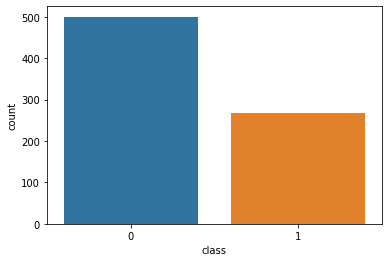

In [22]:
sns.countplot(x="class", data=pima_df)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

1. Plasma, mass and age are significant factors to determine the diabetes
2. Plasma is the best factor for analysis as the meadian for plasma and class are distinctly seperate

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


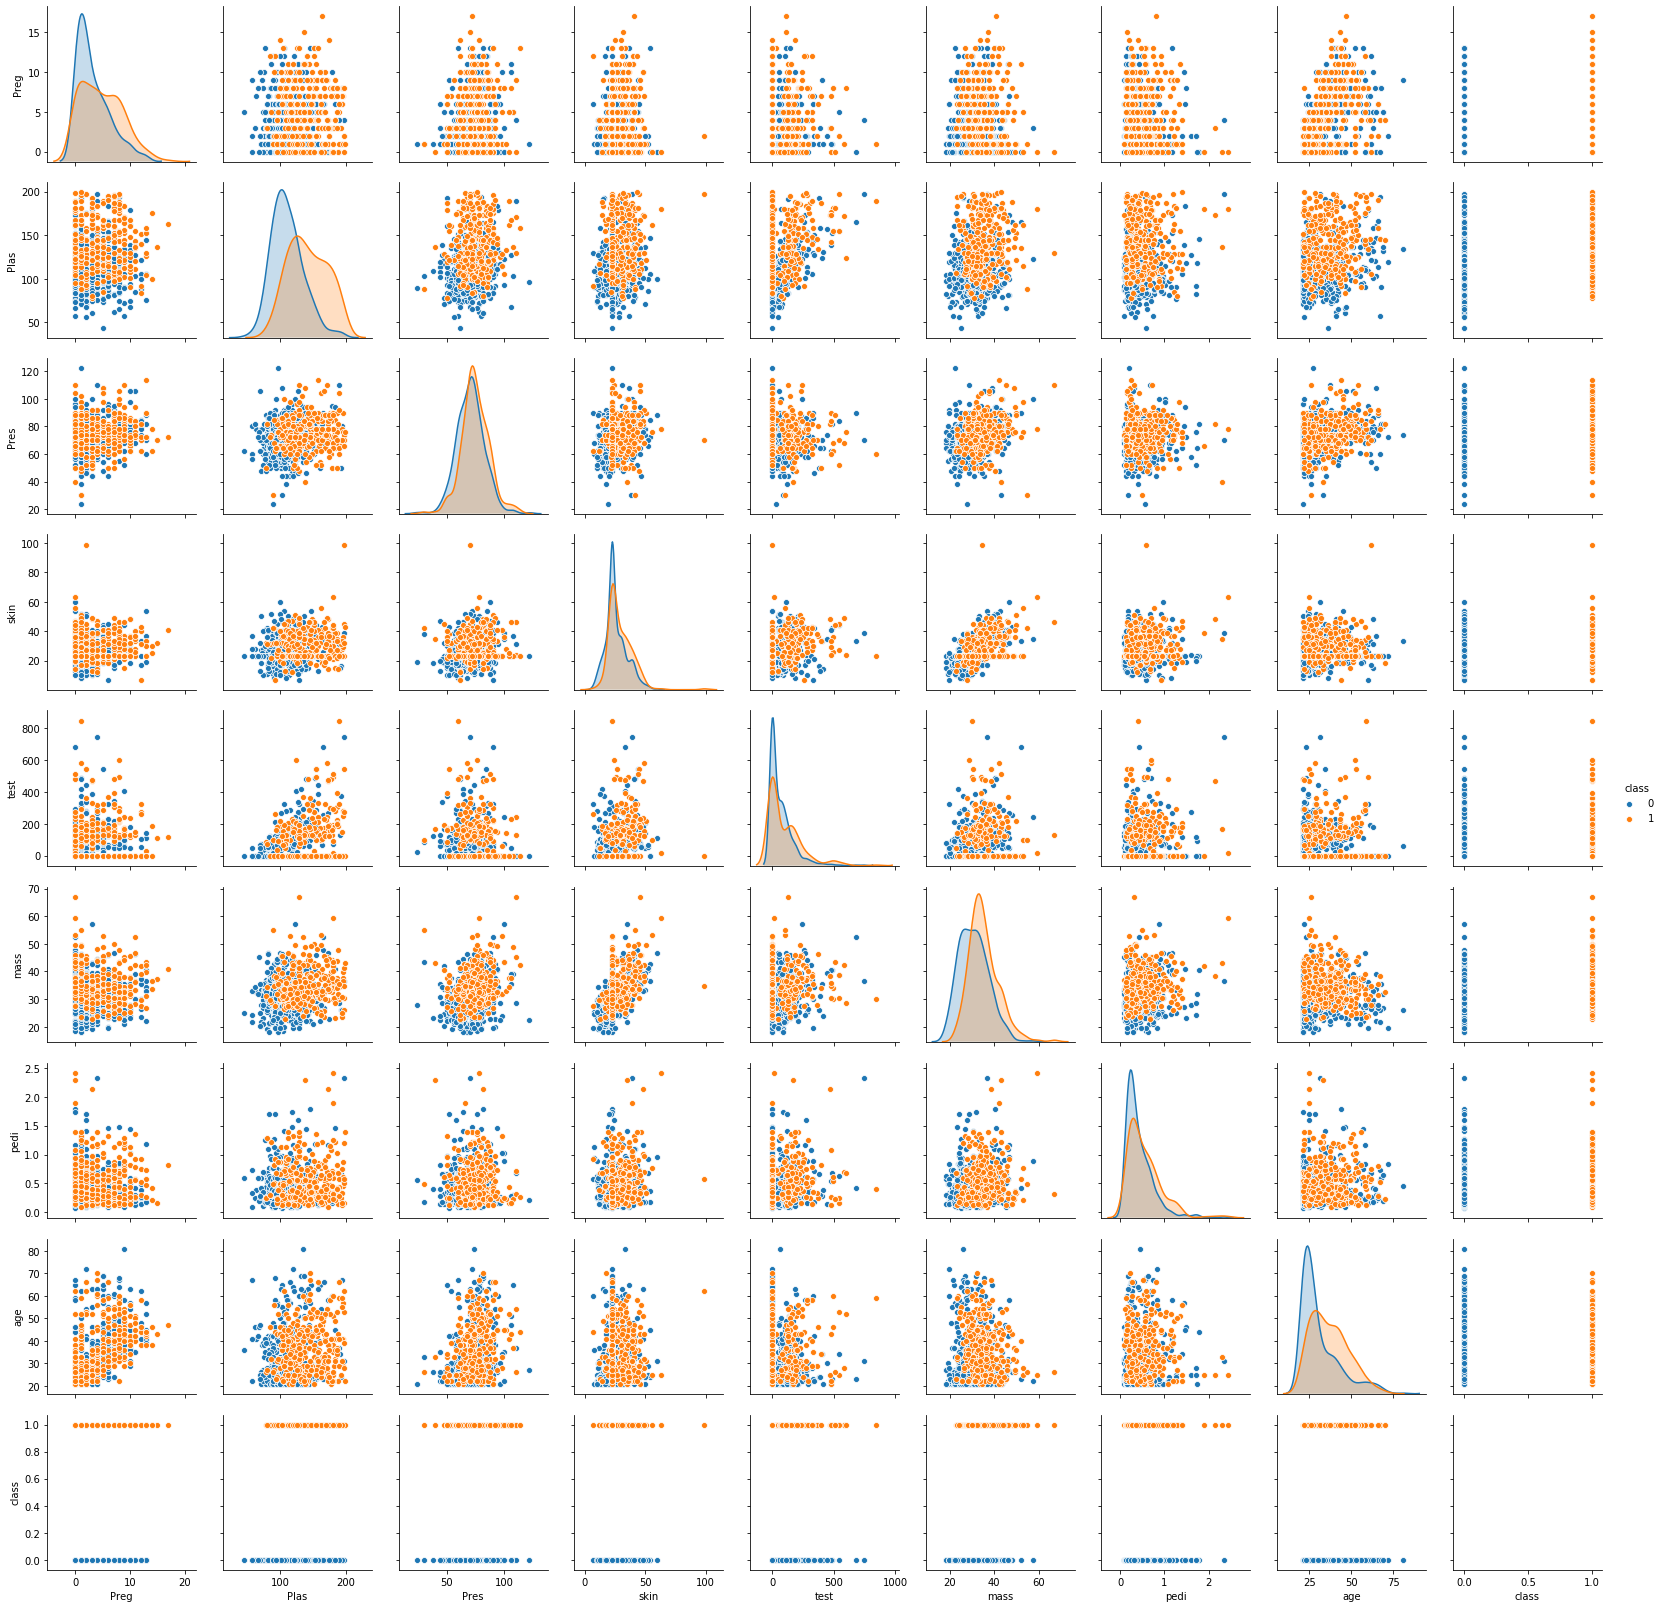

In [21]:
sns.pairplot(pima_df,diag_kind='kde',hue='class')

           Preg      Plas      Pres      skin      test      mass      pedi  \
Preg   1.000000  0.128213  0.208615  0.032568 -0.073535  0.021546 -0.033523   
Plas   0.128213  1.000000  0.218937  0.172143  0.331709  0.231400  0.137327   
Pres   0.208615  0.218937  1.000000  0.147809 -0.045769  0.281132 -0.002378   
skin   0.032568  0.172143  0.147809  1.000000  0.244250  0.546951  0.142977   
test  -0.073535  0.331709 -0.045769  0.244250  1.000000  0.185356  0.185071   
mass   0.021546  0.231400  0.281132  0.546951  0.185356  1.000000  0.153506   
pedi  -0.033523  0.137327 -0.002378  0.142977  0.185071  0.153506  1.000000   
age    0.544341  0.266909  0.324915  0.054514 -0.042163  0.025744  0.033561   
class  0.221898  0.492782  0.165723  0.189065  0.130548  0.312249  0.173844   

            age     class  
Preg   0.544341  0.221898  
Plas   0.266909  0.492782  
Pres   0.324915  0.165723  
skin   0.054514  0.189065  
test  -0.042163  0.130548  
mass   0.025744  0.312249  
pedi   0.0335

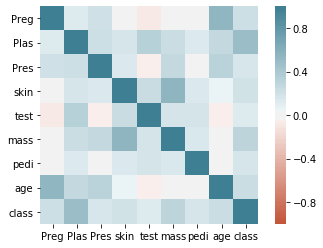

In [9]:
#Print correlation matrix
corr = pima_df.corr()
print(corr)
#plot heat map
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

There is a strongest correlation for class are
1. Plasma
2. Mass
3. Preg

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [10]:
X=pima_df.drop('class',axis=1)
y=pima_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [26]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [27]:
print("What is the Testing Accuracy")
print(dt.score(X_test,y_test))
print("What is the Training  Accuracy")
print(dt.score(X_train,y_train ))
print("Confusion Matrix")
predicted = dt.predict(X_test)
confusion_matrix(y_test,predicted)

What is the Testing Accuracy
0.7359307359307359
What is the Training  Accuracy
1.0
Confusion Matrix


array([[113,  33],
       [ 28,  57]], dtype=int64)

Print the feature importance of the decision model - Optional

In [28]:
dt.feature_importances_

array([0.09499865, 0.22723332, 0.13348261, 0.03457236, 0.        ,
       0.24796861, 0.11562926, 0.14611518])

Plasma and mass are most significant features